# Q. Visit the Kaggle website. Find out the dataset related to classification problem type for any domain. 

# i) construct the problem statement 

--> Prediction task is to determine whether a person makes over 50K a year.

# ii) mention your approach to solve the problem.
    Load Dataset
    Exploratory Data Analysis
    Feature Engineering
    Create Model
    Train and Test the Model
    Check Models score
    Make Prediction on New Data

# Algorithams to be used to check the performance of Model:
    DecisionTreeClassifier
    KNeighborsClassifier
    LogisticRegression

In [146]:
# Required libraries import
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

In [147]:
#load dataset 
data=pd.read_csv('income_evaluation.csv')

In [148]:
# Provide description of the data
data.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
# Provide information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education-num  32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalgain    32561 non-null  int64 
 11  capitalloss    32561 non-null  int64 
 12  hoursperweek   32561 non-null  int64 
 13  nativecountry  32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [150]:
# There are no any mssing values in the data
data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
education-num    0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
income           0
dtype: int64

In [151]:
# List of column names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

# Found some '?' in the dataset features
Before removing the unwanted '?' from dataset 32561 rows

In [152]:
data

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Changing the ? values to NaN and then removing the NaN values

In [153]:
shape0 = data.shape[0]
for column in data.columns:
    data[column].replace(' ?', np.NaN, inplace=True)
data = data.dropna().reset_index().drop(columns=['index'])
shape1 = data.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


# After removing the unwanted '?' from dataset 30162 rows

In [154]:
data

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [155]:
# Label Encoding
le1=LabelEncoder()
le1.fit(data.workclass)
data.workclass=le1.transform(data.workclass)

le2=LabelEncoder()
le2.fit(data.education)
data.education=le2.transform(data.education)

le3=LabelEncoder()
le3.fit(data.maritalstatus)
data.maritalstatus=le3.transform(data.maritalstatus)

le4=LabelEncoder()
le4.fit(data.occupation)
data.occupation=le4.transform(data.occupation)

le5=LabelEncoder()
le5.fit(data.relationship)
data.relationship=le5.transform(data.relationship)

le6=LabelEncoder()
le6.fit(data.race)
data.race=le6.transform(data.race)

le7=LabelEncoder()
le7.fit(data.sex)
data.sex=le7.transform(data.sex)

le8=LabelEncoder()
le8.fit(data.nativecountry)
data.nativecountry=le8.transform(data.nativecountry)

# Label Encoding
le9=LabelEncoder()
le9.fit(data.income)
data.income=le9.transform(data.income)

# After encoding the required features in dataset

In [156]:
data

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
30158,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
30159,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
30160,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


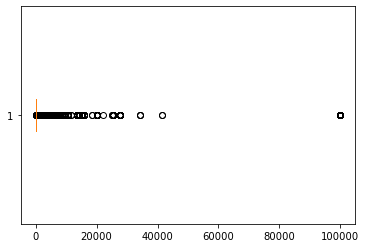

In [157]:
# Only 1 column is there where we can check the outliers 

# We have find the outliers however with consideration to the data we can not remove the same

plt.boxplot(data['capitalgain'],vert=False)
plt.show()

In [158]:
income = data.income.value_counts()
income

0    22654
1     7508
Name: income, dtype: int64

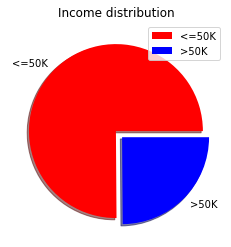

In [159]:
colors=['red','blue']
explode = [0, 0.1]
plt.pie(income, labels=['<=50K','>50K'], colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=['<=50K','>50K'])

In [160]:
# Check the corelation in data
data.corr()

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education-num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
maritalstatus,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


In [162]:
# create input Dataset 
X= data.drop(columns=['income'])
# create output dataset
y= data['income']

# Give training and testing dataset to model 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

# Initiate the DecisionTreeClassifier 
model_d= DecisionTreeClassifier()
# Train the model with 80% of training data 
model_d= model_d.fit(X_train,y_train)
# Test model predtiction using DecisionTreeClassifier
predictions_d=model_d.predict(X_test)
#check the accuracy score using DecisionTreeClassifier 
score_d = accuracy_score(y_test,predictions_d)


# Initiate KNeighborsClassifier
model_k= KNeighborsClassifier(n_neighbors=3)
# Train the model with 80% of training data 
model_k=model_k.fit(X_train,y_train)
# Test model predtiction using KNeighborsClassifier
predictions_k=model_k.predict(X_test)
#check the accuracy score  
score_k = accuracy_score(y_test,predictions_k)


#initiate the LogisticRegression 
model_l= LogisticRegression()
# Train the LogisticRegression model with 80% of training data 
model_l= model_l.fit(X_train,y_train)
# Test LogisticRegression model predtiction  
predictions_l =model_l.predict(X_test)
#check the LogisticRegression accuracy score  
score_l = accuracy_score(y_test,predictions_l)
score_l

print("Score using DecisionTreeClassifier", score_d)
print("Score using KNeighborsClassifier", score_k)
print("Score using LogisticRegression", score_l)

# Find out the best score from all 3 algorithams
if (score_d >= score_k) and (score_d >= score_l):
    best_score = score_d
elif (score_k >= score_d) and (score_k >= score_l):
    best_score = score_k
else:
    best_score = score_l

print("\n\n\n The best score given is", best_score)

Score using DecisionTreeClassifier 0.8082214486988232
Score using KNeighborsClassifier 0.7551798441902867
Score using LogisticRegression 0.7942980275153323



 The best score given is 0.8082214486988232


In [163]:
# Expecting result to be 1 - Got correct result
model_d.predict([[52,3,287927,11,9,2,3,5,4,0,15024,0,40,38]])

array([1])

In [164]:
# Expecting result to be 1 - Got correct result
model_k.predict([[52,3,287927,11,9,2,3,5,4,0,15024,0,40,38]])

array([1])

In [165]:
# Expecting result to be 1 - Got correct result
model_l.predict([[52,3,287927,11,9,2,3,5,4,0,15024,0,40,38]])

array([1])

In [166]:
cm_d=confusion_matrix(y_test,predictions_d)
cm_d

array([[3937,  568],
       [ 589,  939]], dtype=int64)

In [167]:
cm_k=confusion_matrix(y_test,predictions_k)
cm_k

array([[3960,  545],
       [ 932,  596]], dtype=int64)

In [168]:
cm_l=confusion_matrix(y_test,predictions_l)
cm_l

array([[4365,  140],
       [1101,  427]], dtype=int64)

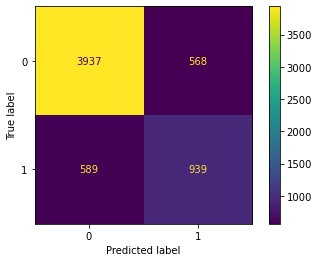

In [169]:
disp_d = ConfusionMatrixDisplay(confusion_matrix=cm_d, display_labels=model_d.classes_)
disp_d.plot()
plt.show()

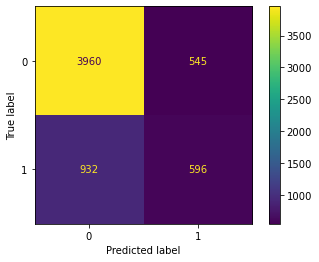

In [170]:
disp_k = ConfusionMatrixDisplay(confusion_matrix=cm_k, display_labels=model_k.classes_)
disp_k.plot()
plt.show()

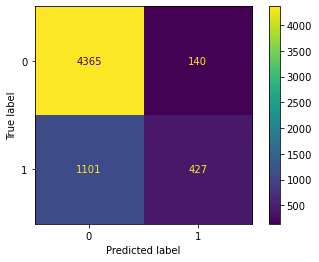

In [171]:
disp_l = ConfusionMatrixDisplay(confusion_matrix=cm_l, display_labels=model_l.classes_)
disp_l.plot()
plt.show()

In [172]:
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4505
           1       0.62      0.61      0.62      1528

    accuracy                           0.81      6033
   macro avg       0.75      0.74      0.75      6033
weighted avg       0.81      0.81      0.81      6033



In [173]:
print(classification_report(y_test,predictions_k))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4505
           1       0.52      0.39      0.45      1528

    accuracy                           0.76      6033
   macro avg       0.67      0.63      0.64      6033
weighted avg       0.74      0.76      0.74      6033



In [174]:
print(classification_report(y_test,predictions_l))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4505
           1       0.75      0.28      0.41      1528

    accuracy                           0.79      6033
   macro avg       0.78      0.62      0.64      6033
weighted avg       0.79      0.79      0.76      6033

